In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def show_cv2(title, img):
    cv2.imshow(title, img)
    cv2.waitKey()
    cv2.destroyAllWindows()

def show_plt(title, img):
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_img)
    plt.title(title)
    plt.axis("off")

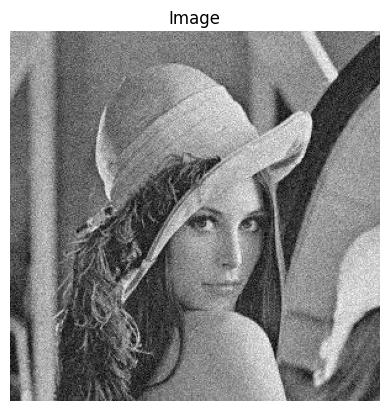

In [8]:
# img = "lowcontrast.jpg"
# img = "mri.jpg"
# img = "pcb.jpg"
img = "noise.jpg"

img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)

show_plt("Image", img)

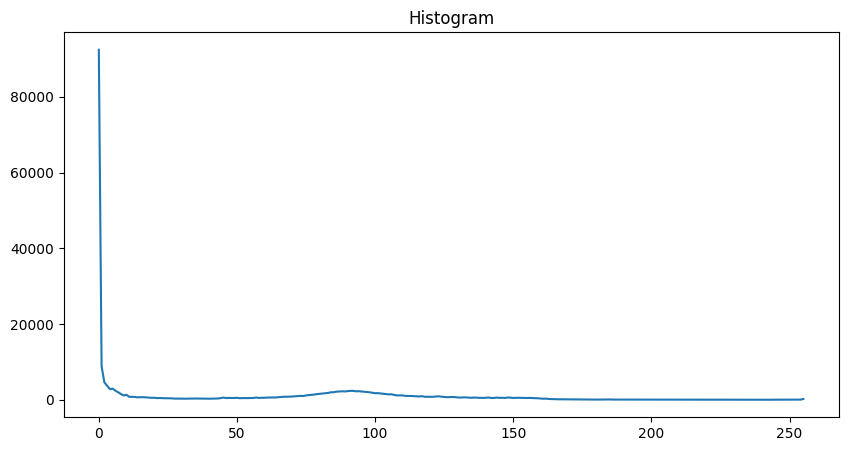

In [29]:
# Histogram
hist = cv2.calcHist([img], [0], None, [256], [0,256])

plt.figure(figsize=(10,5))
plt.title("Histogram")
plt.plot(hist)

In [9]:
# Low-pass filtering
def gaussian_kernel(kernel_size, sigma):
    if kernel_size %2 == 0:
        raise ValueError("kernel size phải là số lẻ")
    
    center = kernel_size // 2 
    kernel = np.zeros((kernel_size, kernel_size), dtype=np.float64)

    for i in range(kernel_size):
        for j in range(kernel_size):
            x = i - center
            y = j - center
            kernel[i, j] = np.exp(-(x*x + y*y) / (2 * sigma * sigma))
    kernel = kernel / kernel.sum()
    return kernel

print(gaussian_kernel(3, 0.5))

[[0.01134374 0.08381951 0.01134374]
 [0.08381951 0.61934703 0.08381951]
 [0.01134374 0.08381951 0.01134374]]


In [10]:
def convolve2d_numpy(image, kernel):
    h, w = image.shape
    k = kernel.shape[0]
    pad = k // 2

    # Padding ảnh
    padded = np.pad(image, pad, mode='reflect')

    output = np.zeros_like(image, dtype=np.float64)

    for i in range(h):
        for j in range(w):
            region = padded[i:i+k, j:j+k]
            output[i, j] = np.sum(region * kernel)

    return output

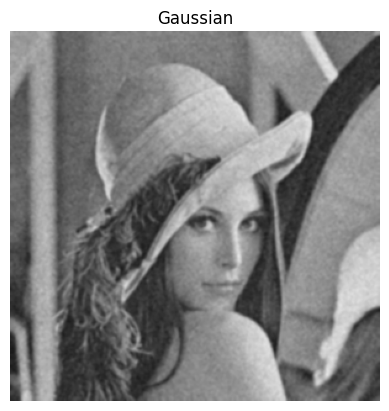

In [22]:
kernel = gaussian_kernel(5, 1.0)
blur = convolve2d_numpy(img, kernel)
blur = np.clip(blur, 0, 255).astype(np.uint8)

show_plt("Gaussian", blur)

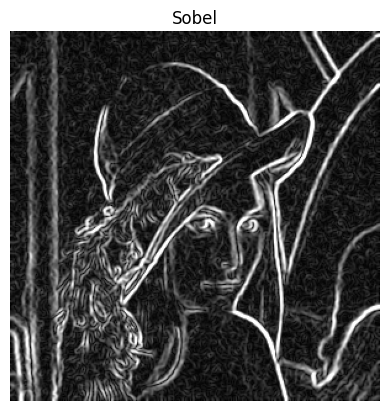

In [20]:
# Hight-pass filtering
Sx = np.array([
    [-1, 0,  1],
    [-2, 0,  2],
    [-1, 0,  1]
])

Sy = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

gx = convolve2d_numpy(blur, Sx)
gy = convolve2d_numpy(blur, Sy)

sobel_mag = np.sqrt(gx**2 + gy**2)
sobel_mag = np.clip(sobel_mag, 0, 255).astype(np.uint8)

show_plt("Sobel", sobel_mag)

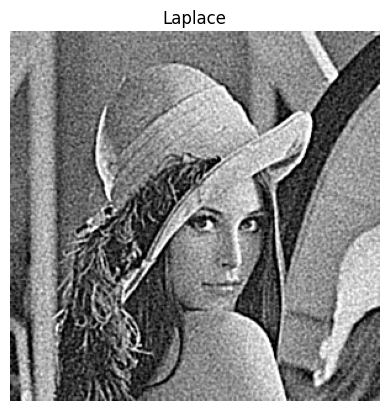

In [40]:
lap_kernel = np.array([
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
])

gl = convolve2d_numpy(blur, lap_kernel)
gl = np.clip(gl, 0, 255).astype(np.uint8)

show_plt("Laplace", gl)